### AMAZON SALE REPORT ANALYSIS

https://www.youtube.com/watch?v=afPJeQuVeuY&ab_channel=TrentDoesMath

In [1]:
import pandas as pd 
import sklearn
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import MinMaxScaler, StandardScaler
import matplotlib.pyplot as plt 
import seaborn as sns

In [5]:
df = pd.read_csv(r'C:\Users\marco\Downloads\NoteBooks DMML\MY_PROJECTS\Practise_sales_report\Sales Transaction v.4a.csv')
df.head()

,TransactionNo,Date,ProductNo,ProductName,Price,Quantity,CustomerNo,Country
0,581482,12/9/2019,22485,Set Of 2 Wooden Market Crates,21.47,12,17490.0,United Kingdom
1,581475,12/9/2019,22596,Christmas Star Wish List Chalkboard,10.65,36,13069.0,United Kingdom
2,581475,12/9/2019,23235,Storage Tin Vintage Leaf,11.53,12,13069.0,United Kingdom
3,581475,12/9/2019,23272,Tree T-Light Holder Willie Winkie,10.65,12,13069.0,United Kingdom
4,581475,12/9/2019,23239,Set Of 4 Knick Knack Tins Poppies,11.94,6,13069.0,United Kingdom


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 536350 entries, 0 to 536349
Data columns (total 8 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   TransactionNo  536350 non-null  object 
 1   Date           536350 non-null  object 
 2   ProductNo      536350 non-null  object 
 3   ProductName    536350 non-null  object 
 4   Price          536350 non-null  float64
 5   Quantity       536350 non-null  int64  
 6   CustomerNo     536295 non-null  float64
 7   Country        536350 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 32.7+ MB


In [7]:
df = df[df['Quantity'] >= 0]


As we can see from above, the variable 'CustomerNo' has missing values.

In [8]:
df.describe()

,Price,Quantity,CustomerNo
count,527765.000000,527765.000000,527764.000000
mean,12.629636,10.594674,15231.626733
std,7.933217,156.786646,1716.522182
min,5.130000,1.000000,12004.000000
25%,10.990000,1.000000,13813.000000
50%,11.940000,3.000000,15159.000000
75%,14.090000,11.000000,16729.000000
max,660.620000,80995.000000,18287.000000


In [9]:
df['CustomerNo'].isnull().sum()

1

From the moment that missing values are only 55, so 0.1% of the dataset, we are going to delete those records.

In [10]:
df = df.dropna(subset=['CustomerNo'])

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 527764 entries, 0 to 536324
Data columns (total 8 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   TransactionNo  527764 non-null  object 
 1   Date           527764 non-null  object 
 2   ProductNo      527764 non-null  object 
 3   ProductName    527764 non-null  object 
 4   Price          527764 non-null  float64
 5   Quantity       527764 non-null  int64  
 6   CustomerNo     527764 non-null  float64
 7   Country        527764 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 36.2+ MB


As we see, the variable Date is presented as an object in our dataset so it's going to be a good idea to convert it in a proper format.

In [12]:
df['Date'] = pd.to_datetime(df['Date'], errors='coerce') 

As we can see, now Date it has been successfully converted in a proper format: datetime64[ns]

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 527764 entries, 0 to 536324
Data columns (total 8 columns):
 #   Column         Non-Null Count   Dtype         
---  ------         --------------   -----         
 0   TransactionNo  527764 non-null  object        
 1   Date           527764 non-null  datetime64[ns]
 2   ProductNo      527764 non-null  object        
 3   ProductName    527764 non-null  object        
 4   Price          527764 non-null  float64       
 5   Quantity       527764 non-null  int64         
 6   CustomerNo     527764 non-null  float64       
 7   Country        527764 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 36.2+ MB


## Feature Engineering

In [14]:
c_df = df.copy()

In [15]:
c_df['SalesLineTotal'] = c_df['Price'] * c_df['Quantity']
c_df

,TransactionNo,Date,ProductNo,ProductName,Price,Quantity,CustomerNo,Country,SalesLineTotal
0,581482,2019-12-09,22485,Set Of 2 Wooden Market Crates,21.47,12,17490.0,United Kingdom,257.64
1,581475,2019-12-09,22596,Christmas Star Wish List Chalkboard,10.65,36,13069.0,United Kingdom,383.40
2,581475,2019-12-09,23235,Storage Tin Vintage Leaf,11.53,12,13069.0,United Kingdom,138.36
3,581475,2019-12-09,23272,Tree T-Light Holder Willie Winkie,10.65,12,13069.0,United Kingdom,127.80
4,581475,2019-12-09,23239,Set Of 4 Knick Knack Tins Poppies,11.94,6,13069.0,United Kingdom,71.64
...,...,...,...,...,...,...,...,...,...
536320,536585,2018-12-01,37449,Ceramic Cake Stand + Hanging Cakes,20.45,2,17460.0,United Kingdom,40.90
536321,536590,2018-12-01,22776,Sweetheart 3 Tier Cake Stand,20.45,1,13065.0,United Kingdom,20.45
536322,536590,2018-12-01,22622,Box Of Vintage Alphabet Blocks,20.45,2,13065.0,United Kingdom,40.90
536323,536591,2018-12-01,37449,Ceramic Cake Stand + Hanging Cakes,20.45,1,14606.0,United Kingdom,20.45


In [16]:
aggregated_df = c_df.groupby('CustomerNo', as_index=False)\
.agg(
    monetary_value = ('SalesLineTotal', 'sum'),
    frequency = ('TransactionNo', 'count'),
    last_transaction_date = ('Date', 'max')
)
aggregated_df.head(10)

,CustomerNo,monetary_value,frequency,last_transaction_date
0,12004.0,1509.60,56,2019-04-26
1,12006.0,24.76,1,2019-05-05
2,12008.0,5689.57,203,2019-03-08
3,12013.0,69.96,1,2018-12-15
4,12024.0,149.52,5,2019-06-16
5,12025.0,1021.59,46,2019-02-25
6,12026.0,20486.32,409,2019-01-04
7,12031.0,136.18,7,2019-09-30
8,12042.0,6296.77,223,2019-03-20
9,12043.0,1235.59,36,2019-07-05


In [17]:
max_transaction_date = aggregated_df['last_transaction_date'].max()


In [18]:
aggregated_df['recency'] = (max_transaction_date - aggregated_df['last_transaction_date']).dt.days
aggregated_df

,CustomerNo,monetary_value,frequency,last_transaction_date,recency
0,12004.0,1509.60,56,2019-04-26,227
1,12006.0,24.76,1,2019-05-05,218
2,12008.0,5689.57,203,2019-03-08,276
3,12013.0,69.96,1,2018-12-15,359
4,12024.0,149.52,5,2019-06-16,176
...,...,...,...,...,...
4713,18280.0,623.26,10,2019-03-07,277
4714,18281.0,576.58,7,2019-06-12,180
4715,18282.0,1044.86,12,2019-12-02,7
4716,18283.0,12114.61,754,2019-12-06,3


<function matplotlib.pyplot.show(close=None, block=None)>

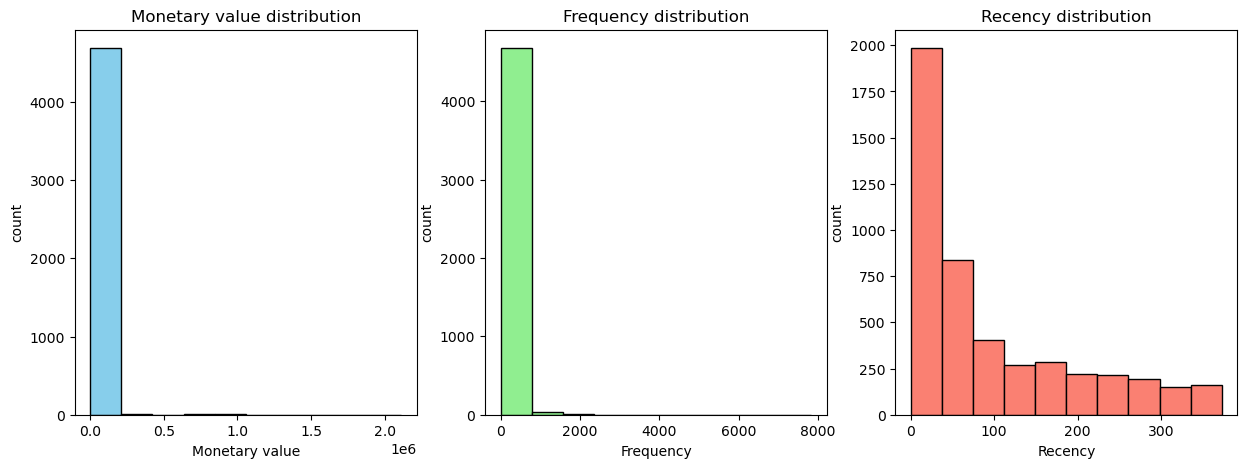

In [19]:
plt.figure(figsize=(15,5))

plt.subplot(1, 3, 1)
plt.hist(aggregated_df['monetary_value'], bins=10, color='skyblue', edgecolor='black')
plt.title('Monetary value distribution')
plt.xlabel('Monetary value')
plt.ylabel('count')

plt.subplot(1, 3, 2)
plt.hist(aggregated_df['frequency'], bins=10, color='lightgreen', edgecolor='black')
plt.title('Frequency distribution')
plt.xlabel('Frequency')
plt.ylabel('count')

plt.subplot(1, 3, 3)
plt.hist(aggregated_df['recency'], bins=10, color='salmon', edgecolor='black')
plt.title('Recency distribution')
plt.xlabel('Recency')
plt.ylabel('count')

plt.tight_layout
plt.show

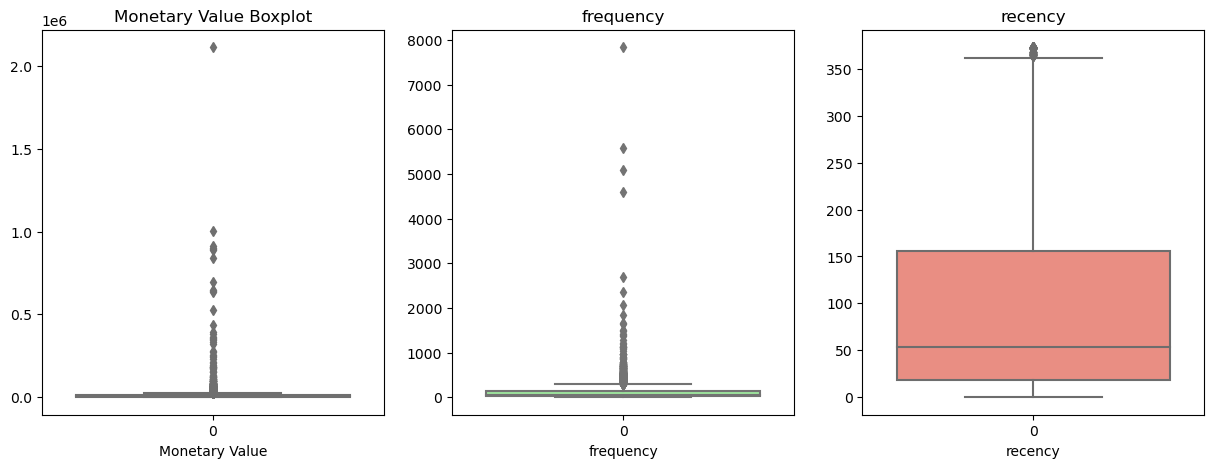

In [20]:
plt.figure(figsize=(15,5))

plt.subplot(1, 3, 1)
sns.boxplot(data=aggregated_df['monetary_value'], color='skyblue')
plt.title('Monetary Value Boxplot')
plt.xlabel('Monetary Value')

plt.subplot(1,3,2)
sns.boxplot(aggregated_df['frequency'], color='lightgreen')
plt.title('frequency')
plt.xlabel('frequency')

plt.subplot(1,3,3)
sns.boxplot(aggregated_df['recency'], color='salmon')
plt.title('recency')
plt.xlabel('recency')

plt.tight_layout
plt.show()

Now that we have graphically visualized the presence of outliers, we proceed with isolation

In [21]:
M_Q1 = aggregated_df['monetary_value'].quantile(0.25)
M_Q3 = aggregated_df['monetary_value'].quantile(0.75)
M_IQR = M_Q3 - M_Q1 

monetary_outliers_df = aggregated_df[(aggregated_df["monetary_value"] > (M_Q3 + 1.5 * M_IQR)) | (aggregated_df["monetary_value"] < (M_Q1 - 1.5 * M_IQR))].copy()

monetary_outliers_df.describe()

,CustomerNo,monetary_value,frequency,last_transaction_date,recency
count,401.000000,4.010000e+02,401.000000,401,401.000000
mean,15011.169576,8.809863e+04,418.431421,2019-11-10 13:20:47.880299520,28.443890
min,12346.000000,2.708190e+04,1.000000,2018-12-02 00:00:00,0.000000
25%,13324.000000,3.345055e+04,162.000000,2019-11-10 00:00:00,3.000000
50%,14895.000000,4.356350e+04,275.000000,2019-11-28 00:00:00,11.000000
75%,16626.000000,6.793722e+04,452.000000,2019-12-06 00:00:00,29.000000
max,18251.000000,2.112282e+06,7835.000000,2019-12-09 00:00:00,372.000000
std,1789.867280,1.684029e+05,650.382969,NaN,53.357637


In [22]:
M_Q1 = aggregated_df['frequency'].quantile(0.25)
M_Q3 = aggregated_df['frequency'].quantile(0.75)
M_IQR = M_Q3 - M_Q1 

frequency_outliers_df = aggregated_df[(aggregated_df["frequency"] > (M_Q3 + 1.5 * M_IQR)) | (aggregated_df["frequency"] < (M_Q1 - 1.5 * M_IQR))].copy()

frequency_outliers_df.describe()

,CustomerNo,monetary_value,frequency,last_transaction_date,recency
count,412.000000,4.120000e+02,412.000000,412,412.000000
mean,15150.689320,5.905630e+04,560.461165,2019-10-31 09:47:11.067961088,38.592233
min,12026.000000,4.661890e+03,297.000000,2018-12-01 00:00:00,0.000000
25%,13642.250000,1.579176e+04,343.000000,2019-11-06 18:00:00,3.000000
50%,15041.500000,2.407604e+04,420.000000,2019-11-27 00:00:00,12.000000
75%,16712.250000,4.675862e+04,567.500000,2019-12-06 00:00:00,32.250000
max,18283.000000,2.112282e+06,7835.000000,2019-12-09 00:00:00,373.000000
std,1726.611942,1.529775e+05,601.542345,NaN,70.587240


In [23]:
M_Q1 = aggregated_df['recency'].quantile(0.25)
M_Q3 = aggregated_df['recency'].quantile(0.75)
M_IQR = M_Q3 - M_Q1 

recency_outliers_df = aggregated_df[(aggregated_df["recency"] > (M_Q3 + 1.5 * M_IQR)) | (aggregated_df["recency"] < (M_Q1 - 1.5 * M_IQR))].copy()

recency_outliers_df.describe() 

,CustomerNo,monetary_value,frequency,last_transaction_date,recency
count,82.000000,82.000000,82.000000,82,82.000000
mean,15367.390244,3631.310976,53.073171,2018-12-04 21:39:30.731707392,369.097561
min,12060.000000,25.700000,1.000000,2018-12-01 00:00:00,364.000000
25%,13388.000000,701.210000,7.000000,2018-12-02 00:00:00,366.000000
50%,15680.500000,1416.540000,13.000000,2018-12-06 00:00:00,368.000000
75%,16842.250000,2246.872500,37.750000,2018-12-08 00:00:00,372.000000
max,18269.000000,45914.400000,649.000000,2018-12-10 00:00:00,373.000000
std,1952.882585,7444.298402,129.223204,NaN,3.207282


In [24]:
non_outliers_df = aggregated_df[(~aggregated_df.index.isin(monetary_outliers_df.index)) & (~aggregated_df.index.isin(frequency_outliers_df.index))]

non_outliers_df.describe()

,CustomerNo,monetary_value,frequency,last_transaction_date,recency
count,4095.000000,4095.000000,4095.000000,4095,4095.000000
mean,15264.354823,5846.747319,64.289377,2019-08-26 08:27:25.714285568,104.647619
min,12004.000000,5.970000,1.000000,2018-12-01 00:00:00,0.000000
25%,13759.500000,1625.715000,16.000000,2019-06-20 00:00:00,23.000000
50%,15272.000000,3781.580000,41.000000,2019-10-07 00:00:00,63.000000
75%,16762.500000,8336.605000,91.000000,2019-11-16 00:00:00,172.000000
max,18287.000000,26875.240000,295.000000,2019-12-09 00:00:00,373.000000
std,1739.473142,5741.897844,65.288986,NaN,103.160764


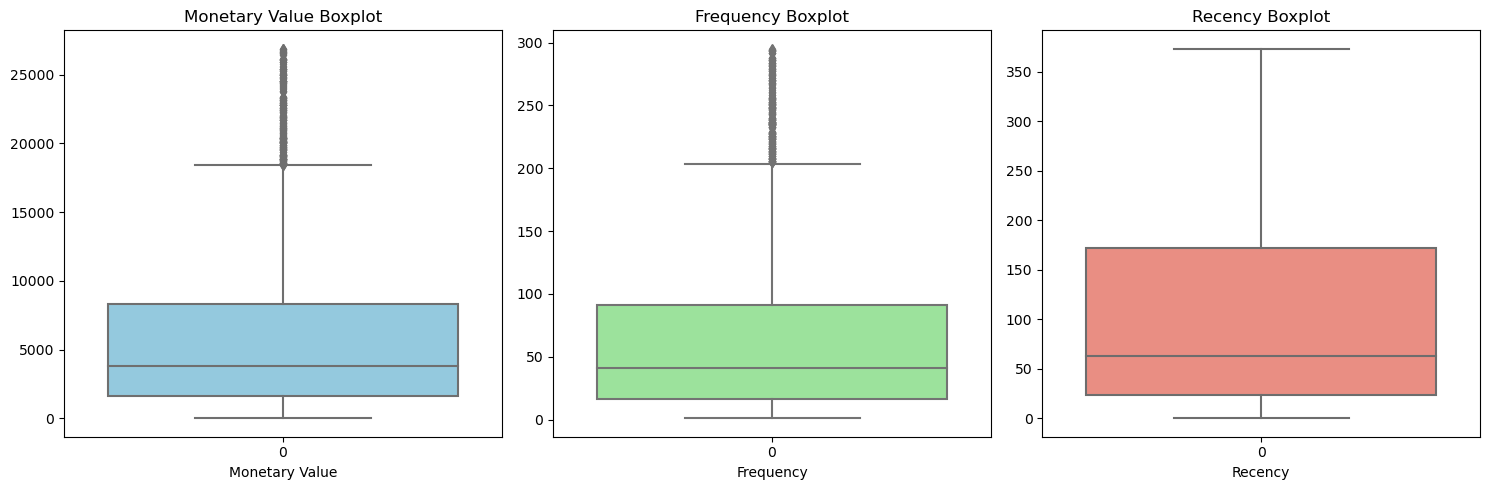

In [25]:
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
sns.boxplot(data=non_outliers_df['monetary_value'], color='skyblue')
plt.title('Monetary Value Boxplot')
plt.xlabel('Monetary Value')

plt.subplot(1, 3, 2)
sns.boxplot(data=non_outliers_df['frequency'], color='lightgreen')
plt.title('Frequency Boxplot')
plt.xlabel('Frequency')

plt.subplot(1, 3, 3)
sns.boxplot(data=non_outliers_df['recency'], color='salmon')
plt.title('Recency Boxplot')
plt.xlabel('Recency')

plt.tight_layout()
plt.show()

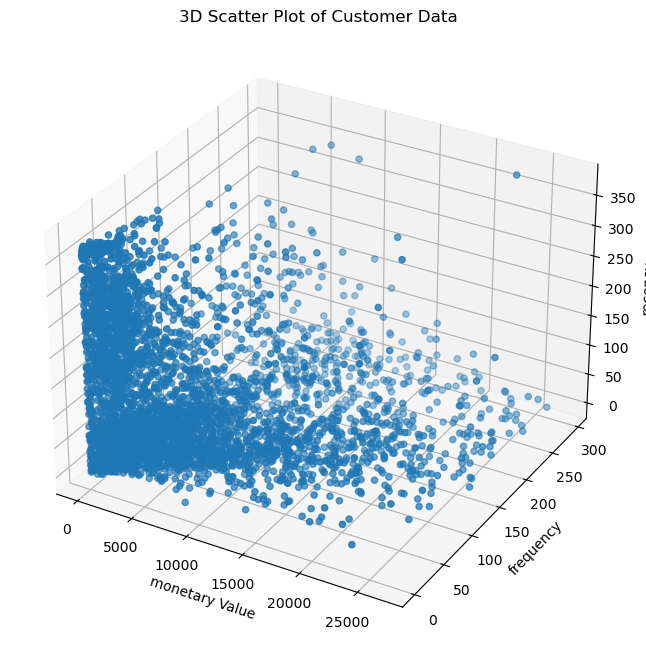

In [26]:
fig = plt.figure(figsize=(8, 8))

ax = fig.add_subplot(projection="3d")

scatter = ax.scatter(non_outliers_df["monetary_value"], non_outliers_df["frequency"], non_outliers_df["recency"])

ax.set_xlabel('monetary Value')
ax.set_ylabel('frequency')
ax.set_zlabel('recency')

ax.set_title('3D Scatter Plot of Customer Data')

plt.show()

We are going to use the standard scaler from sklearn in order to standardize the value of feature.

In [27]:
scaler = StandardScaler()

scaled_data = scaler.fit_transform(non_outliers_df[['monetary_value', 'frequency', 'recency']])
scaled_data

array([[-0.75544308, -0.12697991,  1.18618085],
       [-1.01407208, -0.96949134,  1.09892772],
       [-0.0273771 ,  2.12482335,  1.66122564],
       ...,
       [-0.91795623, -0.877581  ,  0.73052564],
       [-0.83639136, -0.80098905, -0.94667333],
       [ 2.14115859,  0.08747754, -0.60735562]])

Let's convert our numpy array into a dataframe again

In [28]:
scaled_data_df = pd.DataFrame(scaled_data, index=non_outliers_df.index, columns=('monetary_value', 'frequency', 'recency'))
scaled_data_df

,monetary_value,frequency,recency
0,-0.755443,-0.126980,1.186181
1,-1.014072,-0.969491,1.098928
2,-0.027377,2.124823,1.661226
3,-1.006199,-0.969491,2.465893
4,-0.992341,-0.908218,0.691746
...,...,...,...
4712,-0.869527,-0.846944,-0.306817
4713,-0.909826,-0.831626,1.670920
4714,-0.917956,-0.877581,0.730526
4715,-0.836391,-0.800989,-0.946673


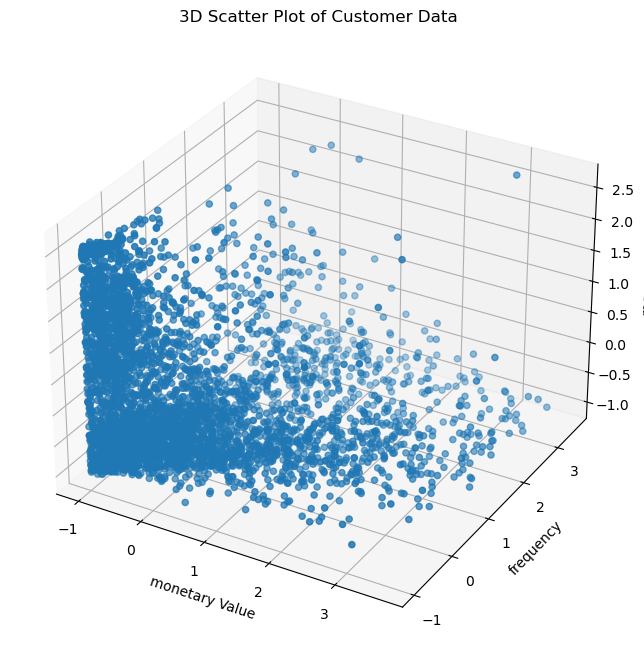

In [29]:
fig = plt.figure(figsize=(8, 8))

ax = fig.add_subplot(projection="3d")

scatter = ax.scatter(scaled_data_df["monetary_value"], scaled_data_df["frequency"], scaled_data_df["recency"])

ax.set_xlabel('monetary Value')
ax.set_ylabel('frequency')
ax.set_zlabel('recency')

ax.set_title('3D Scatter Plot of Customer Data')

plt.show()

### KMeans clustering

c:\Users\marco\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\marco\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\marco\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\marco\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of

<function matplotlib.pyplot.show(close=None, block=None)>

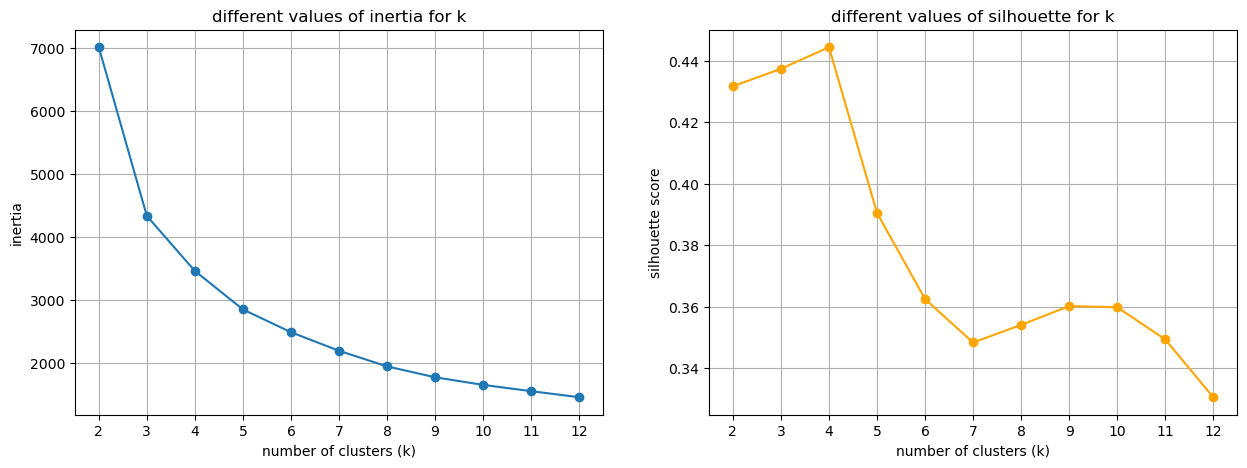

In [30]:
max_value = 12

inertia = []
silhouette_scores = []

k_values = range(2, max_value+1)
for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42, max_iter=1000)
    
    cluster_labels = kmeans.fit_predict(scaled_data_df)
    sil_score = silhouette_score(scaled_data_df, cluster_labels)
    silhouette_scores.append(sil_score)
    inertia.append(kmeans.inertia_)
    
plt.figure(figsize=(15,5))

plt.subplot(1,2,1)
plt.plot(k_values, inertia, marker='o')
plt.title('different values of inertia for k')
plt.xlabel('number of clusters (k)')
plt.ylabel('inertia')
plt.xticks(k_values)
plt.grid(True)

plt.subplot(1,2,2)
plt.plot(k_values, silhouette_scores, marker='o', color='orange')
plt.title('different values of silhouette for k')
plt.xlabel('number of clusters (k)')
plt.ylabel('silhouette score')
plt.xticks(k_values)
plt.grid(True)

plt.show
    

In [31]:
kmeans = KMeans(n_clusters=4, random_state=42, max_iter=1000)
cluster_labels = kmeans.fit_predict(scaled_data_df)
cluster_labels

c:\Users\marco\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


array([3, 3, 2, ..., 3, 0, 1])

In [32]:
non_outliers_df['Cluster'] = cluster_labels
non_outliers_df.head(6)

C:\Users\marco\AppData\Local\Temp\ipykernel_27276\3964915109.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  non_outliers_df['Cluster'] = cluster_labels


,CustomerNo,monetary_value,frequency,last_transaction_date,recency,Cluster
0,12004.0,1509.60,56,2019-04-26,227,3
1,12006.0,24.76,1,2019-05-05,218,3
2,12008.0,5689.57,203,2019-03-08,276,2
3,12013.0,69.96,1,2018-12-15,359,3
4,12024.0,149.52,5,2019-06-16,176,3
5,12025.0,1021.59,46,2019-02-25,287,3


In [33]:
non_outliers_df[non_outliers_df['monetary_value']<0]

,CustomerNo,monetary_value,frequency,last_transaction_date,recency,Cluster


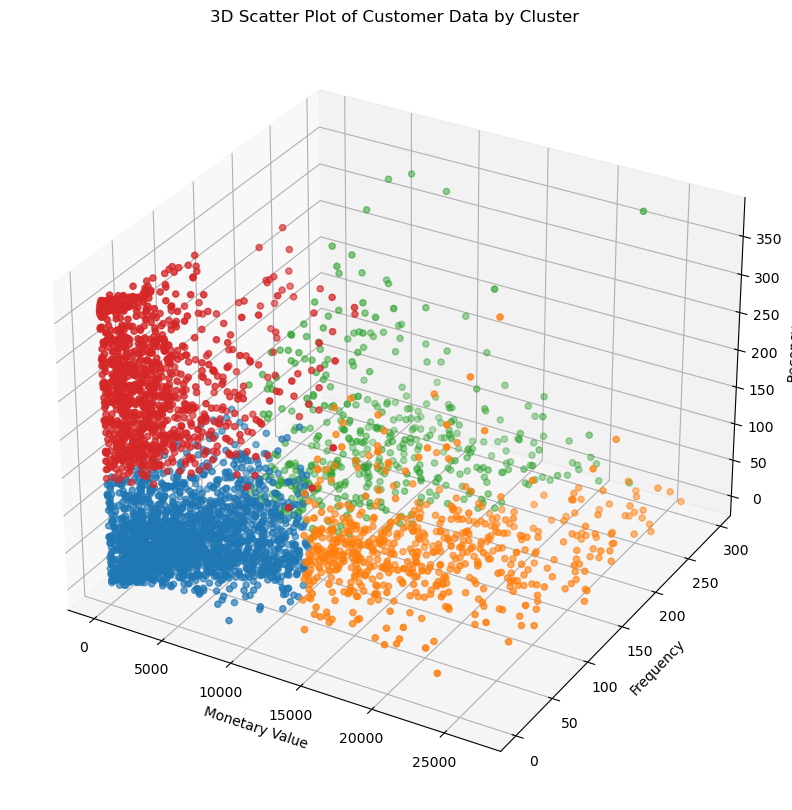

In [34]:
cluster_colors = {0: '#1f77b4',  # Blue
                  1: '#ff7f0e',  # Orange
                  2: '#2ca02c',  # Green
                  3: '#d62728'}  # Red

colors = non_outliers_df['Cluster'].map(cluster_colors)

fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(projection='3d')

scatter = ax.scatter(non_outliers_df['monetary_value'], 
                     non_outliers_df['frequency'], 
                     non_outliers_df['recency'], 
                     c=colors,  
                     marker='o')

ax.set_xlabel('Monetary Value')
ax.set_ylabel('Frequency')
ax.set_zlabel('Recency')

ax.set_title('3D Scatter Plot of Customer Data by Cluster')

plt.show()

C:\Users\marco\AppData\Local\Temp\ipykernel_27276\2326957899.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  non_outliers_df['Cluster'] = non_outliers_df['Cluster'].astype(str)


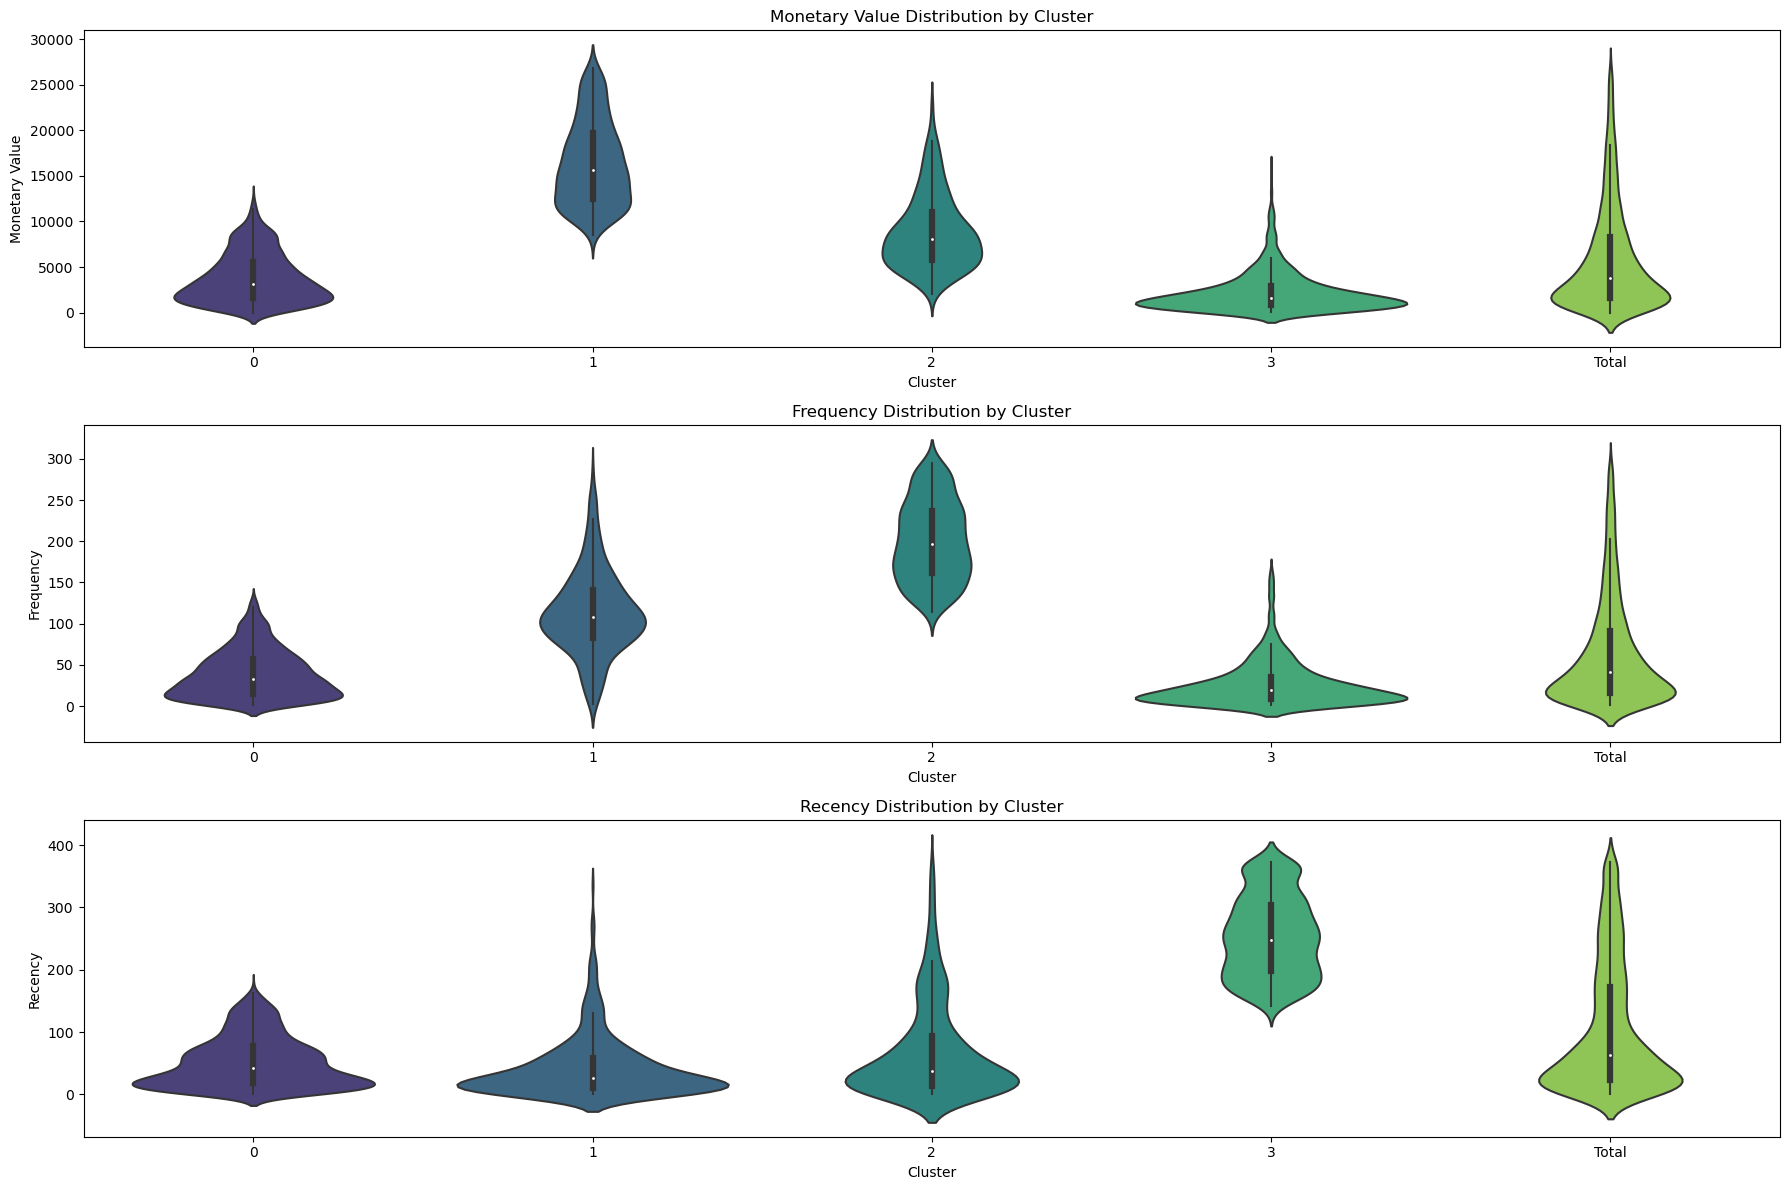

In [35]:

non_outliers_df['Cluster'] = non_outliers_df['Cluster'].astype(str)  
global_df = non_outliers_df.copy()
global_df['Cluster'] = 'Total'  
extended_df = pd.concat([non_outliers_df, global_df])  

plt.figure(figsize=(18, 12))

plt.subplot(3, 1, 1)
sns.violinplot(x='Cluster', y='monetary_value', data=extended_df, palette='viridis', order=sorted(non_outliers_df['Cluster'].unique()) + ['Total'])
plt.title('Monetary Value Distribution by Cluster')
plt.xlabel('Cluster')
plt.ylabel('Monetary Value')

plt.subplot(3, 1, 2)
sns.violinplot(x='Cluster', y='frequency', data=extended_df, palette='viridis', order=sorted(non_outliers_df['Cluster'].unique()) + ['Total'])
plt.title('Frequency Distribution by Cluster')
plt.xlabel('Cluster')
plt.ylabel('Frequency')

plt.subplot(3, 1, 3)
sns.violinplot(x='Cluster', y='recency', data=extended_df, palette='viridis', order=sorted(non_outliers_df['Cluster'].unique()) + ['Total'])
plt.title('Recency Distribution by Cluster')
plt.xlabel('Cluster')
plt.ylabel('Recency')

plt.tight_layout()
plt.show()




*Cluster 0, Inactive:* Represents a group of customers with low monetary value, frequency, and recency. These customers spend less, make infrequent purchases, and have not engaged with the brand recently. This indicates they may be occasional or inactive users with low overall engagement.

*Recommended Actions*: To engage this cluster, targeted marketing campaigns and re-engagement strategies should be implemented. Consider offering personalized discounts, loyalty programs, or promotions to incentivize repeat purchases.

*Cluster 1, Loyal but Dormant:* represents customers who have a high monetary value (i.e., they spend a lot when they do engage) and a moderate frequency of transactions, but have not engaged recently. This suggests that they might be loyal customers with strong past purchases who have not interacted with the brand for some time.

*Recommended Actions:*
Re-engagement Campaigns: Target this group with personalized marketing campaigns or special offers to encourage them to make a purchase or interact with the brand again.
*Loyalty Programs*: Implement loyalty programs or incentives to maintain their interest and convert them into more active customers.

*Cluster 2, High-Frequency but Moderate-Value:* This cluster represents customers who have a higher monetary value compared to the overall reference, but not as high as Cluster 1. They also show a significantly higher frequency of transactions compared to the overall average, and their recency is lower but still consistent with the total reference recency.

*Recommended Actions:*
Retention Efforts: Since this group is highly active, focus on retaining their loyalty with exclusive offers or personalized rewards that encourage continued engagement.
Upsell and Cross-Sell Opportunities: Implement strategies to increase their average transaction value, such as upselling or cross-selling related products. 

*Cluster 3, Low-Engagement, High Recency:* This cluster includes customers who exhibit a low monetary value, a low frequency of transactions, and a high recency, indicating that while they have not been active recently, they have made purchases in the past.

*Recommended Actions:*
Re-engagement Campaigns: Focus on strategies to bring these customers back into active purchasing, such as targeted marketing campaigns or promotions to rekindle their interest.

In [36]:
overlap_indices = monetary_outliers_df.index.intersection(frequency_outliers_df.index)

overlap_indices

Index([  69,  126,  137,  142,  157,  172,  173,  175,  178,  217,
       ...
       4327, 4365, 4384, 4403, 4446, 4537, 4545, 4581, 4586, 4593],
      dtype='int64', length=190)

In [38]:
monetary_only_outliers = monetary_outliers_df.drop(overlap_indices)
frequency_only_outliers = frequency_outliers_df.drop(overlap_indices)
monetary_and_frequency_outliers = monetary_outliers_df.loc[overlap_indices]

monetary_only_outliers['Cluster'] = -1
frequency_only_outliers['Cluster'] = -2
monetary_and_frequency_outliers['Cluster'] = -3

outlier_cluster_df = pd.concat([monetary_only_outliers, frequency_only_outliers, monetary_and_frequency_outliers])  
outlier_cluster_df

,CustomerNo,monetary_value,frequency,last_transaction_date,recency,Cluster
68,12346.0,840113.80,1,2019-01-18,325,-1
78,12357.0,33893.72,130,2019-11-06,33,-1
88,12370.0,27599.42,166,2019-10-19,51,-1
95,12378.0,29410.60,219,2019-08-02,129,-1
120,12409.0,66730.26,109,2019-09-22,78,-1
...,...,...,...,...,...,...
4537,18041.0,41769.63,472,2019-11-28,11,-3
4545,18055.0,29532.60,360,2019-12-02,7,-3
4581,18102.0,897137.36,431,2019-12-09,0,-3
4586,18109.0,47594.27,444,2019-12-08,1,-3


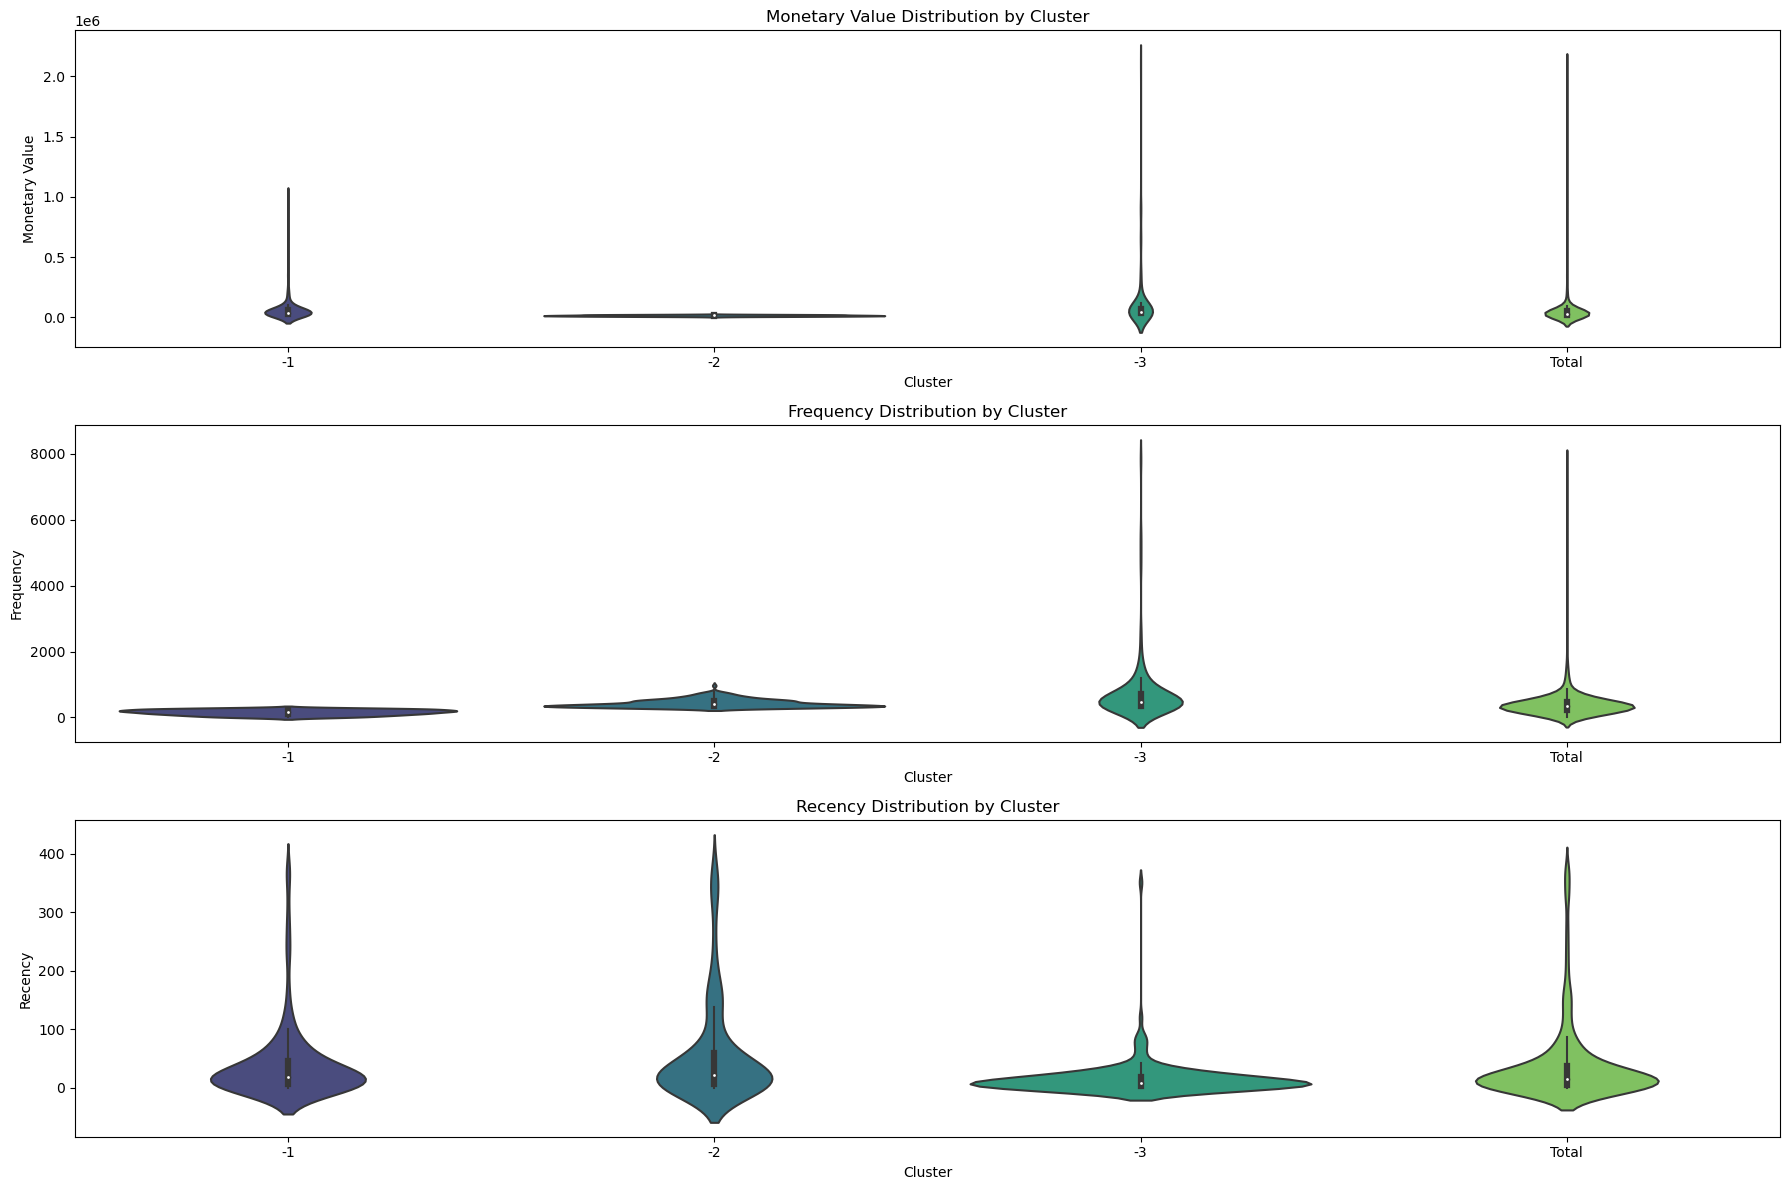

In [39]:
outlier_cluster_df['Cluster'] = outlier_cluster_df['Cluster'].astype(str)  
global_outliers_df = outlier_cluster_df.copy()
global_outliers_df['Cluster'] = 'Total'  
extended_outliers_df = pd.concat([outlier_cluster_df, global_outliers_df])  

plt.figure(figsize=(18, 12))

plt.subplot(3, 1, 1)
sns.violinplot(x='Cluster', y='monetary_value', data=extended_outliers_df, palette='viridis', order=sorted(outlier_cluster_df['Cluster'].unique()) + ['Total'])
plt.title('Monetary Value Distribution by Cluster')
plt.xlabel('Cluster')
plt.ylabel('Monetary Value')

plt.subplot(3, 1, 2)
sns.violinplot(x='Cluster', y='frequency', data=extended_outliers_df, palette='viridis', order=sorted(outlier_cluster_df['Cluster'].unique()) + ['Total'])
plt.title('Frequency Distribution by Cluster')
plt.xlabel('Cluster')
plt.ylabel('Frequency')

plt.subplot(3, 1, 3)
sns.violinplot(x='Cluster', y='recency', data=extended_outliers_df, palette='viridis', order=sorted(outlier_cluster_df['Cluster'].unique()) + ['Total'])
plt.title('Recency Distribution by Cluster')
plt.xlabel('Cluster')
plt.ylabel('Recency')

plt.tight_layout()
plt.show()


*Cluster -1, Dormant Shoppers*:
This cluster has a monetary value distribution similar to the general population, but frequency is significantly lower than the total, and recency is much higher and uniform. Customers in this group make rare purchases and haven't engaged recently.

Action:
Focus on re-engagement strategies, such as targeted promotions or personalized discounts. Implement a win-back email campaign emphasizing offers tailored to their preferences.

*Cluster -2, Low-Value Passersby*:
This cluster has the lowest monetary value among the three, slightly higher frequency than Cluster -1 but still below average, and a high, uniform recency similar to Cluster -1. These customers engage infrequently and spend very little.

Action:
Develop low-cost, high-visibility marketing campaigns such as email newsletters or social media campaigns to encourage repeat purchases. Consider loyalty incentives to boost frequency and spending.

*Cluster -3, Loyal High-Spenders*:
Customers in this cluster show significantly higher monetary value and frequency compared to the others. Recency is also much lower, indicating these customers are more engaged and actively purchasing.

Action:
Treat this cluster as loyal high-value customers. Strengthen their relationship through exclusive offers, early access to new products, and personalized communications. Consider implementing a VIP or loyalty program to maintain engagement.

In [42]:
cluster_labels = {
    0: "ENGAGE",
    1: "REVIVE",
    2: "ELEVATE",
    3: "RECONNECT",
    -1: "REACTIVATE",
    -2: "UPSELL",
    -3: "RETAIN"
}

In [55]:
full_clustering_df = pd.concat([non_outliers_df, outlier_cluster_df])
full_clustering_df
full_clustering_df["Cluster"] = full_clustering_df["Cluster"].astype(int)


In [57]:
full_clustering_df["ClusterLabel"] = full_clustering_df["Cluster"].map(cluster_labels)

full_clustering_df

,CustomerNo,monetary_value,frequency,last_transaction_date,recency,Cluster,ClusterLabel
0,12004.0,1509.60,56,2019-04-26,227,3,RECONNECT
1,12006.0,24.76,1,2019-05-05,218,3,RECONNECT
2,12008.0,5689.57,203,2019-03-08,276,2,ELEVATE
3,12013.0,69.96,1,2018-12-15,359,3,RECONNECT
4,12024.0,149.52,5,2019-06-16,176,3,RECONNECT
...,...,...,...,...,...,...,...
4537,18041.0,41769.63,472,2019-11-28,11,-3,RETAIN
4545,18055.0,29532.60,360,2019-12-02,7,-3,RETAIN
4581,18102.0,897137.36,431,2019-12-09,0,-3,RETAIN
4586,18109.0,47594.27,444,2019-12-08,1,-3,RETAIN


In [71]:
cluster_counts = full_clustering_df['ClusterLabel'].value_counts()
full_clustering_df["Monetary_value per 100 pounds"] = full_clustering_df["monetary_value"] / 100.00
feature_means = full_clustering_df.groupby('ClusterLabel')[['recency', 'frequency', 'Monetary_value per 100 pounds']].mean()

c:\Users\marco\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\marco\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


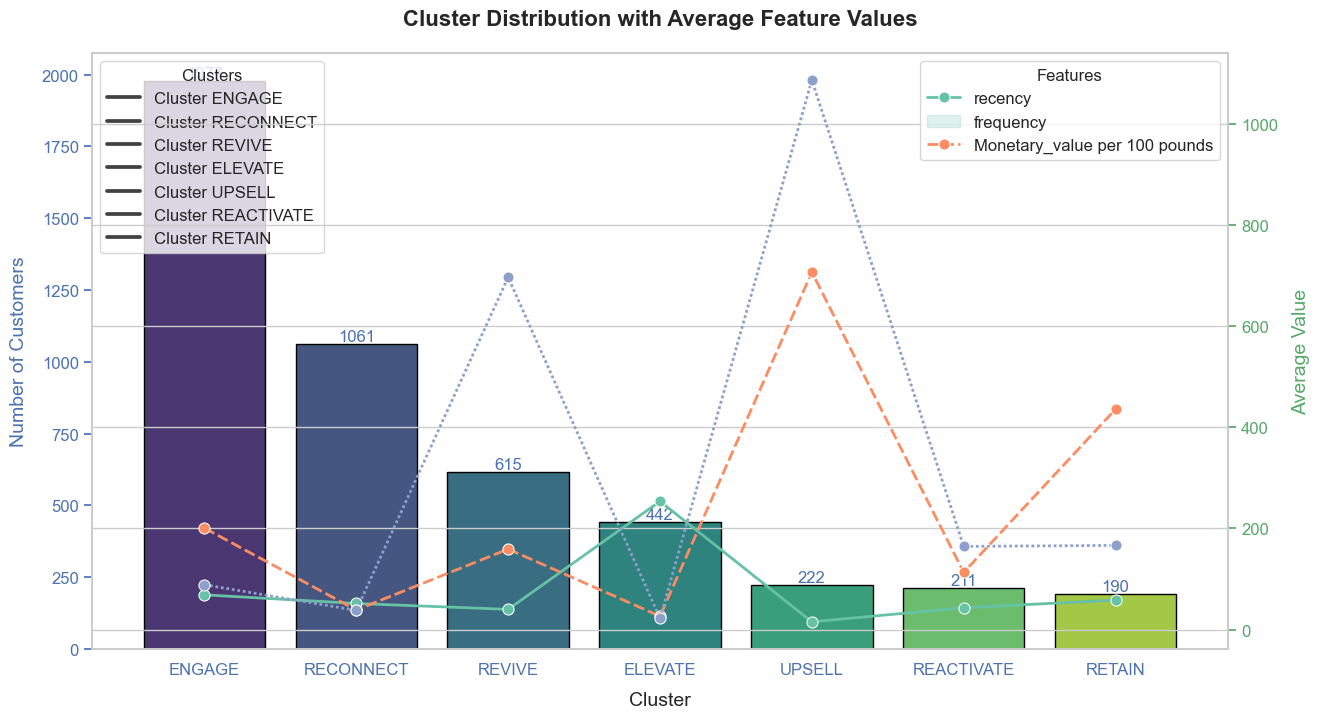

In [ ]:
import matplotlib.ticker as ticker

sns.set_theme(style="whitegrid")

fig, ax1 = plt.subplots(figsize=(14, 8))

bar_palette = sns.color_palette('viridis', len(cluster_counts.index))
sns.barplot(
    x=cluster_counts.index, 
    y=cluster_counts.values, 
    ax=ax1, 
    palette=bar_palette, 
    edgecolor='black'
)

ax1.set_xlabel('Cluster', fontsize=14, labelpad=10)
ax1.set_ylabel('Number of Customers', fontsize=14, labelpad=10, color='b')
ax1.set_title('Cluster Distribution with Average Feature Values', fontsize=16, pad=20, weight='bold')
ax1.tick_params(axis='both', labelsize=12, colors='b')
ax1.grid(visible=False)  

for p in ax1.patches:
    ax1.annotate(f'{int(p.get_height())}', 
                 (p.get_x() + p.get_width() / 2, p.get_height()), 
                 ha='center', va='bottom', fontsize=12, color='b')

ax2 = ax1.twinx()

line_palette = sns.color_palette('Set2', feature_means.shape[1])
sns.lineplot(
    data=feature_means, 
    ax=ax2, 
    palette=line_palette, 
    marker='o', 
    linewidth=2, 
    markersize=8
)

ax2.set_ylabel('Average Value', fontsize=14, labelpad=10, color='g')
ax2.tick_params(axis='y', labelsize=12, colors='g')

bar_legend = ax1.legend(
    [f'Cluster {i}' for i in cluster_counts.index], 
    title='Clusters', 
    loc='upper left', 
    fontsize=12
)
ax2.legend(
    labels=feature_means.columns, 
    title='Features', 
    loc='upper right', 
    fontsize=12
)

fig.tight_layout(pad=3.0)
plt.show()
